In [2]:
def get_slope(data,m,c):
    slope=np.array([0.0 for i in range(0,len(data[0])-1)]);
    #print(m,c);
    c_slope=0;
    temp=[(m*data[i,0:-1]).sum() for i in range(0,len(data))]
    for u in range(0,len(slope)):
        slope[u]=2/(len(data))*sum([(data[i,-1]-temp[i]-c)*(-1*data[i,u]) for i in range(0,len(data))]);
    c_slope=2/(len(data))*sum([(data[i,-1]-temp[i]-c)*(-1) for i in range(0,len(data))]);
    return slope,c_slope;

In [39]:
def grad(data,alpha,num_iterations):
    m=np.array([0 for i in range(0,len(data[0])-1)]);
    c=0;
    for i in range(0,num_iterations):
        slope,c_slope=get_slope(data,m,c);
        m=m-alpha*slope;
        c=c-alpha*c_slope;
        #print(m,c);
       # print(cost(data,m,c));
    return m,c;

In [9]:
def findoutput(data,m,c):
    output=np.array([(data[i,]*m).sum() +c for i in range(0,len(data))]);
    return output;

In [8]:
def cost(data,m,c):
    total_cost=sum([(data[i,-1]-(data[i,0:-1]*m + c).sum())**2 for i in range(0,len(data))]);
    return total_cost/len(data);

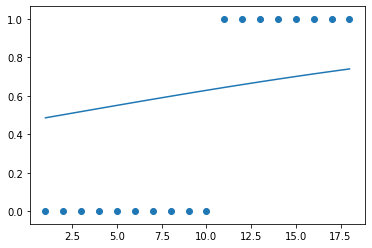

[0.06484078949376892] -0.12176616480172425
[-0.05692537530795533   0.007915414185813596  0.07275620367958252
  0.13759699317335145   0.20243778266712037   0.2672785721608893
  0.3321193616546582    0.39696015114842714   0.46180094064219607
  0.5266417301359649    0.591482519629734     0.6563233091235028
  0.7211640986172718    0.7860048881110406    0.8508456776048097
  0.9156864670985785    0.9805272565923473    1.0453680460861163  ]


In [54]:
import numpy as np;
import matplotlib.pyplot as plt;
from sklearn import preprocessing;
np.set_printoptions(precision=20);
data=np.loadtxt('train.csv',delimiter=",");
data=np.array([[1,0],[2,0],[3,0],[4,0],[5,0],[6,0],[7,0],[8,0],[9,0],[10,0],[11,1],[12,1],[13,1],[14,1],[15,1],[16,1],[17,1],[18,1]]);
#print(data);
scaler=preprocessing.StandardScaler();
scaler.fit(data[0:,0:-1]);
scaler.transform(data[0:,0:-1]);
alpha=0.001;
num_iterations=1000;
m,c=grad(data,alpha,num_iterations);
plt.scatter(data[:,0:-1],data[:,-1]);
y=1/(1+np.exp(-1*m*data[:,0:-1]-c));
plt.plot(data[:,0:-1],y);
plt.show();
print(m,c);
print(findoutput(data[:,0:-1],m,c));

In [13]:
data=np.loadtxt('test.csv',delimiter=",");
scaler.transform(data);
y_pred=findoutput(data,m,c);
np.savetxt('predictions.csv',y_pred,fmt='%.9f');
print(y_pred);

[12.433283163608154   29.03367206183974    22.37164470460162
 24.477785650997447   20.60167145814241     2.7253322701632463
 30.400002511878867   24.86119998910311    18.657250218077852
 23.539858367954842   24.11396868280094    17.711438951258284
 17.440004988505414   21.65356361904753    42.31137754129465
 23.849745770140043   24.47573228790675    27.5387277248376
 20.236067718631322   31.15155567670337    23.782380843054057
 25.009794060472863   33.95768518077513    36.43515606728859
 32.0409839934184     16.713225590920707   23.47176648948982
 32.93828179193933    25.180699664168525   33.71008693411526
 16.885802481332384   26.027609433764955   23.270400545276274
 25.47758947541637    15.009466261817012   29.58574991776654
 26.248212464072658   20.372458058199456   24.43681389965212
  9.447069047856536    8.380965952663242   29.013923043915305
 29.59085454512752    19.75757025112273    20.371967494353196
  3.144425921673399   39.52420105901088    25.717412235804723
 30.377294414498